In [57]:
import pandas as pd
import numpy as np
import pickle
import json

In [58]:
# 3d plot the midpoints
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [59]:
sims_file = '../01_GeneratePureSpectrums/sims_01.csv'
res_info_folder = '../01_GeneratePureSpectrums/ResInfo/res_info_'
sims_df = pd.read_csv(sims_file)
print(sims_df)
pickle_files = '../01_GeneratePureSpectrums/specs/'+sims_df['filename']+'.pkl'

   soil_resolution         function    id                      filename
0            7x7x7               Al  1001               7x7x7_Al_001001
1            7x7x7                H  1002                7x7x7_H_001002
2            7x7x7               Na  1003               7x7x7_Na_001003
3            7x7x7                O  1004                7x7x7_O_001004
4            7x7x7               Fe  1005               7x7x7_Fe_001005
5            7x7x7               Mg  1006               7x7x7_Mg_001006
6            7x7x7                C  1007                7x7x7_C_001007
7            7x7x7             SiO2  1008             7x7x7_SiO2_001008
8            7x7x7            Al2O3  1009            7x7x7_Al2O3_001009
9            7x7x7              H2O  1010              7x7x7_H2O_001010
10           7x7x7             Na2O  1011             7x7x7_Na2O_001011
11           7x7x7            Fe2O3  1012            7x7x7_Fe2O3_001012
12           7x7x7              MgO  1013              7x7x7_MgO

In [60]:

i = 20

pickle_file = pickle_files[i]
soil_resolution = sims_df['soil_resolution'][i]
res_info_file = res_info_folder + str(soil_resolution) + '.json'
res_info = json.load(open(res_info_file, 'r'))
midpoints = np.array(res_info['midpoints'])
detector_tally_ids = [int(r) for r in res_info['detector_tally_ids']]
cell_ids = [int(r) for r in res_info['cell_ids']]

In [61]:
filename = sims_df['filename'][i]

In [62]:
detector_tally_ids

[808, 818, 828, 834, 836, 844, 846]

In [63]:
i_bins, i_spectrums= pickle.load(open(pickle_file, 'rb'))
energy_bins = i_bins[-1][-2]

In [64]:
detector_energy_bins = i_bins[0][-2]

In [65]:
detector_spec = i_spectrums[0]

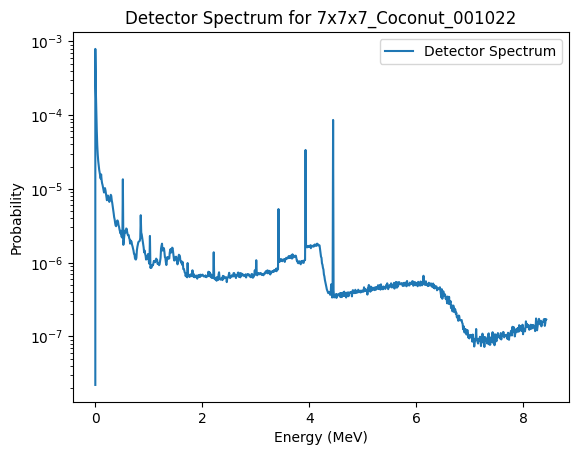

In [66]:
plt.plot(detector_energy_bins, detector_spec.flatten(), label='Detector Spectrum')
plt.xlabel('Energy (MeV)')
plt.ylabel('Probability')
plt.title('Detector Spectrum for ' + sims_df['filename'][i])
plt.legend()
plt.yscale('log')
plt.show()

In [67]:
deposition_bins = [int(bin) for bin in i_bins[-1][0]]
deposition_spec = i_spectrums[-1]

new_shape = np.array(deposition_spec.shape)
new_shape[0] = len(cell_ids)
new_array = np.zeros(new_shape)
for j in range(len(cell_ids)):
    if cell_ids[j] in deposition_bins:
        new_array[j] = deposition_spec[deposition_bins.index(cell_ids[j])]

full_deposition_spec = new_array

In [68]:
deposition_intensity = full_deposition_spec
deposition_intensity = np.matmul(energy_bins, deposition_intensity).flatten()
# print(deposition_intensity.shape)
deposition_activity = deposition_intensity
# # put intensity in 0-1 range
deposition_intensity = deposition_intensity / deposition_intensity.max()

In [69]:
flux_bins = [int(bin) for bin in i_bins[-2][0]]
flux_spec = i_spectrums[-2]

new_shape = np.array(flux_spec.shape)
new_shape[0] = len(cell_ids)
new_array = np.zeros(new_shape)
for j in range(len(cell_ids)):
    if cell_ids[j] in flux_bins:
        new_array[j] = flux_spec[flux_bins.index(cell_ids[j])]
full_flux_spec = new_array

In [70]:
flux_intensity = new_array.sum(axis=-2).flatten()
flux_activity = flux_intensity
# put intensity in 0-1 range    
flux_intensity = flux_intensity / flux_intensity.max()

In [71]:
causal_bins = [str(bin)[:len(str(cell_ids[0]))] for bin in i_bins[4][2]]
causal_bins = (np.array(causal_bins)).astype(int).tolist()
causal_spec = i_spectrums[4]
new_shape = np.array(causal_spec.shape)
new_shape[2] = len(cell_ids)
print(new_shape)
new_array = np.zeros(new_shape)
for j in range(len(cell_ids)):
    if cell_ids[j] in causal_bins:
        new_array[:, :, j] = causal_spec[:, :, causal_bins.index(cell_ids[j])]
full_causal_spec = new_array
causal_intensity = np.matmul(detector_energy_bins, full_causal_spec).flatten()
causal_activity = causal_intensity
causal_intensity = causal_intensity / causal_intensity.max()

[  1   1 343   1   1   1 935   1]


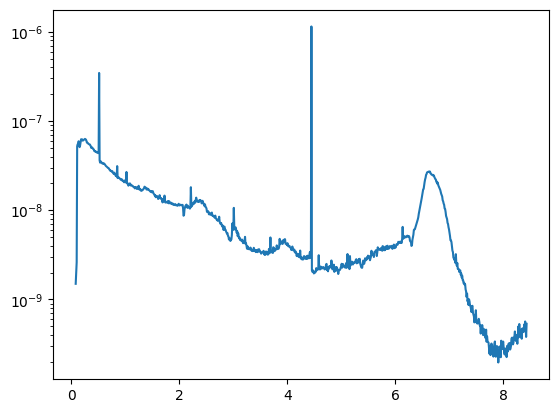

In [72]:
_spec1 = i_spectrums[4][:, :, :].sum(axis=2).flatten()
_spec2 = i_spectrums[3][:, :, :].sum(axis=2).flatten()

plt.plot(detector_energy_bins[10:], (_spec2-_spec1)[10:])
plt.yscale('log')

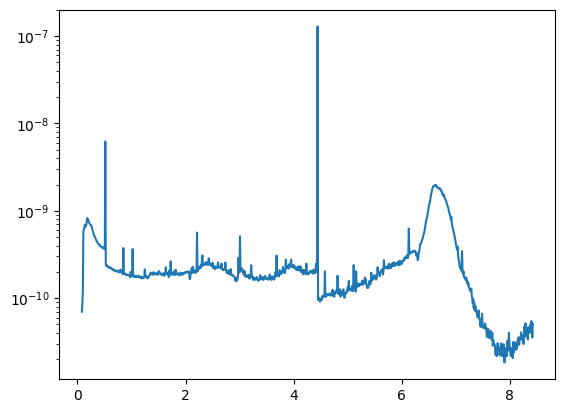

In [73]:
plt.plot(detector_energy_bins[10:], i_spectrums[4][:, :, :].sum(axis=2).flatten()[10:])
plt.yscale('log')

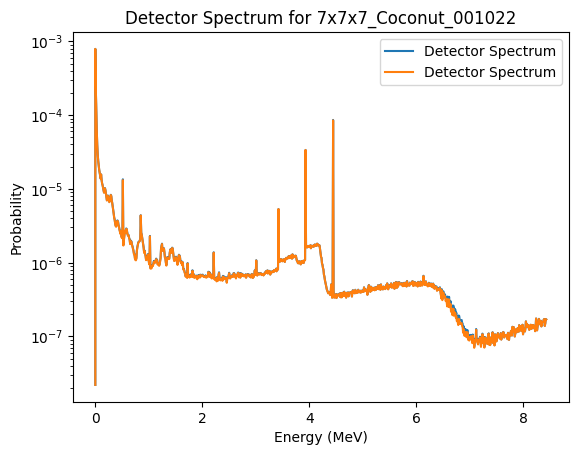

In [74]:
_spec = (_spec2-_spec1)



plt.plot(detector_energy_bins, detector_spec.flatten(), label='Detector Spectrum')
plt.plot(detector_energy_bins, detector_spec.flatten()-_spec, label='Detector Spectrum')
plt.xlabel('Energy (MeV)')
plt.ylabel('Probability')
plt.title('Detector Spectrum for ' + sims_df['filename'][i])
plt.legend()
plt.yscale('log')
plt.show()

In [75]:
((277/60)*10*22)/60

16.927777777777777

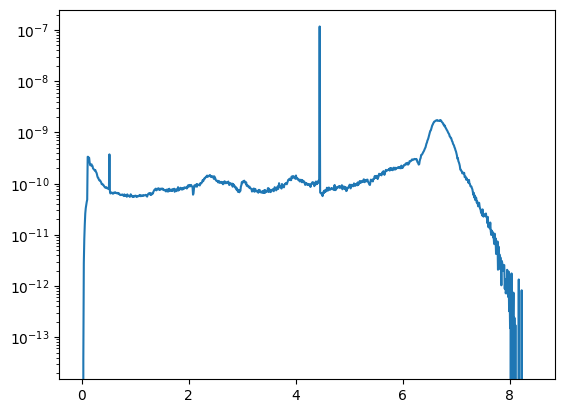

In [76]:
plt.plot(detector_energy_bins, i_spectrums[4][:, :, :-1].sum(axis=2).flatten())
plt.yscale('log')

In [77]:
def onespec(specs,bins=energy_bins, n=0):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    ax.plot(bins, specs[n].flatten(), label='Cell ID: {}'.format(cell_ids[n]))
    ax.set_yscale('log')
    plt.title('Cell ID: {}'.format(cell_ids[n]))
    fig.show()

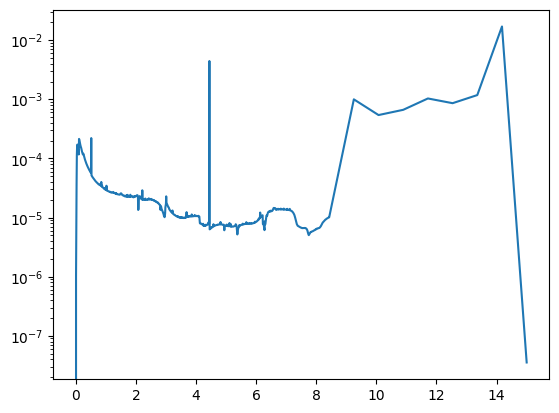

In [78]:
plt.plot(energy_bins, (full_flux_spec-full_deposition_spec).sum(axis=0).flatten())
plt.yscale('log')

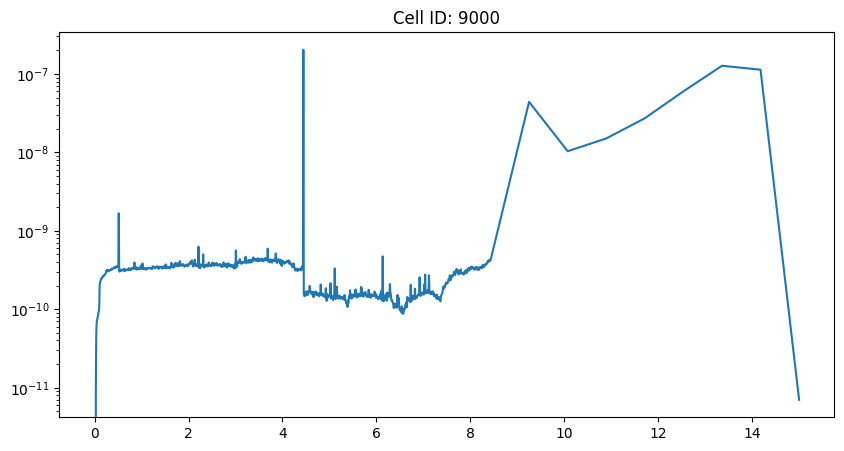

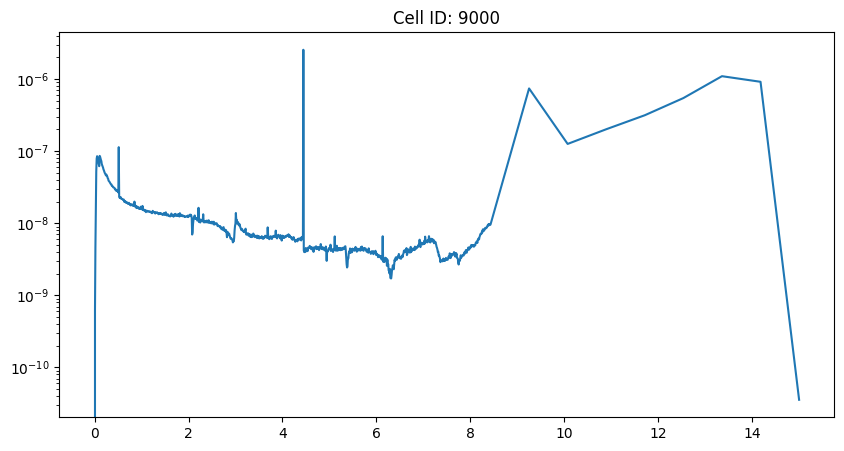

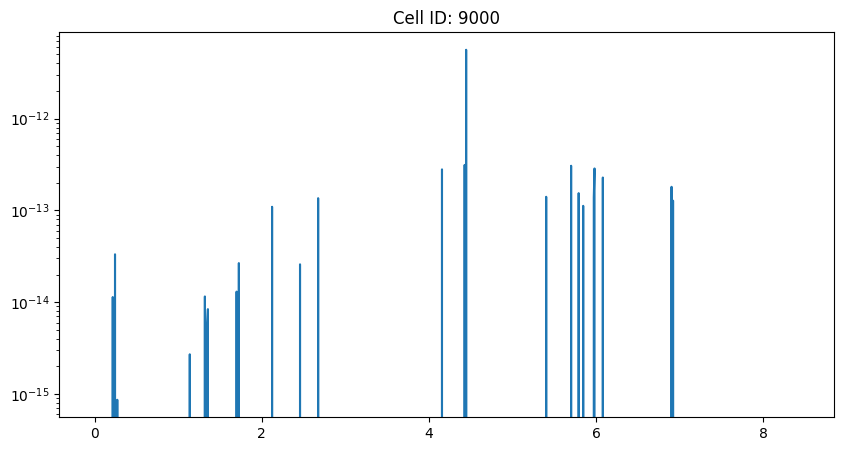

In [79]:

onespec(full_deposition_spec, n=0)
onespec(full_flux_spec, n=0)
onespec(full_causal_spec[0, 0, :], detector_energy_bins, n=0)

In [80]:
def intensitymap(intensity, elev, azim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # ax.scatter(midpoints[:, 0], midpoints[:, 1], midpoints[:, 2], c=1-intensity, marker='o', s=intensity*40, alpha=intensity)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    zlim = ax.get_zlim()


    # xx, yy = np.meshgrid(np.linspace(*xlim, 10), np.linspace(*ylim, 10))
    # zz = np.zeros_like(xx)
    # ax.plot_surface(xx, yy, zz-20, alpha=1, color='black')

    # xx, zz = np.meshgrid(np.linspace(*xlim, 10), np.linspace(*zlim, 10))
    # yy = np.zeros_like(xx)
    # ax.plot_surface(xx, yy, zz, alpha=1, color='black')

    # yy, zz = np.meshgrid(np.linspace(*ylim, 10), np.linspace(*zlim, 10))
    # xx = np.zeros_like(yy)
    # ax.plot_surface(xx, yy, zz, alpha=1, color='black')

    # change the view angle
    ax.view_init(elev=elev, azim=azim)
    # ax.view_init(elev=0, azim=0)

    # add a color bar
    sc = ax.scatter(midpoints[:, 0], midpoints[:, 1], midpoints[:, 2], c=intensity, marker='o', s=intensity*300, alpha=1)
    fig.colorbar(sc, ax=ax, label='Relative Intensity', shrink=0.5, aspect=10)

    # make voxel style
    # ax.set_box_aspect([1, 1, 1])  # aspect ratio is 1:1:1

    plt.title('3D Scatter Plot of Midpoints with Relative Intensity')
    plt.tight_layout()
    plt.show()

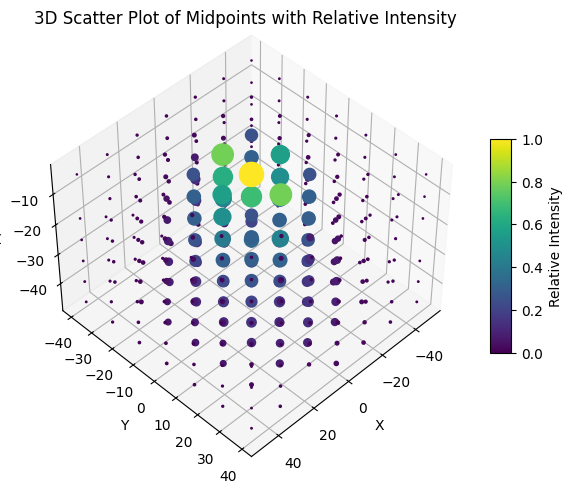

In [81]:
intensitymap(intensity=deposition_intensity, elev=45, azim=45)

In [82]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_box(ax, xmin, xmax, ymin, ymax, zmin, zmax, color, alpha=1, label=None):
    # Draw a rectangular box (RPP)
    x = [xmin, xmax]
    y = [ymin, ymax]
    z = [zmin, zmax]
    for s, e in [
        # bottom
        ([x[0], y[0], z[0]], [x[1], y[0], z[0]]),
        ([x[1], y[0], z[0]], [x[1], y[1], z[0]]),
        ([x[1], y[1], z[0]], [x[0], y[1], z[0]]),
        ([x[0], y[1], z[0]], [x[0], y[0], z[0]]),
        # top
        ([x[0], y[0], z[1]], [x[1], y[0], z[1]]),
        ([x[1], y[0], z[1]], [x[1], y[1], z[1]]),
        ([x[1], y[1], z[1]], [x[0], y[1], z[1]]),
        ([x[0], y[1], z[1]], [x[0], y[0], z[1]]),
        # sides
        ([x[0], y[0], z[0]], [x[0], y[0], z[1]]),
        ([x[1], y[0], z[0]], [x[1], y[0], z[1]]),
        ([x[1], y[1], z[0]], [x[1], y[1], z[1]]),
        ([x[0], y[1], z[0]], [x[0], y[1], z[1]])
    ]:
        ax.plot3D(*zip(s, e), color=color, alpha=alpha)
    if label:
        ax.text((xmin+xmax)/2, (ymin+ymax)/2, zmax, label, color=color)

def plot_cylinder(ax, base, vec, radius, height, color, alpha=1, label=None):
    # Draw a cylinder (RCC)
    x0, y0, z0 = base
    dx, dy, dz = vec
    # Normalize direction vector
    length = np.sqrt(dx**2 + dy**2 + dz**2)
    if length == 0:
        return
    dx, dy, dz = dx/length, dy/length, dz/length
    # Create cylinder along z, then rotate
    z = np.linspace(0, height, 30)
    theta = np.linspace(0, 2*np.pi, 30)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = radius * np.cos(theta_grid)
    y_grid = radius * np.sin(theta_grid)
    # Build rotation matrix
    v = np.array([dx, dy, dz])
    v0 = np.array([0, 0, 1])
    if not np.allclose(v, v0):
        axis = np.cross(v0, v)
        angle = np.arccos(np.dot(v0, v))
        K = np.array([[0, -axis[2], axis[1]],
                      [axis[2], 0, -axis[0]],
                      [-axis[1], axis[0], 0]])
        R = np.eye(3) + np.sin(angle)*K + (1-np.cos(angle))*(K@K)
        xyz = np.stack([x_grid.flatten(), y_grid.flatten(), z_grid.flatten()])
        xyz_rot = R @ xyz
        x_grid = xyz_rot[0].reshape(x_grid.shape)
        y_grid = xyz_rot[1].reshape(y_grid.shape)
        z_grid = xyz_rot[2].reshape(z_grid.shape)
    x_grid += x0
    y_grid += y0
    z_grid += z0
    ax.plot_surface(x_grid, y_grid, z_grid, color=color, alpha=alpha, linewidth=0)
    if label:
        ax.text(x0, y0, z0+height/2, label, color=color)

In [83]:


def frontfaceavg(midpoints, intensity, elev, azim):
    """
    Returns midpoints and intensity values averaged along the front face,
    and the index of the axis perpendicular to the front face.
    The axes are mapped to matplotlib's convention:
    vx = Y axis, vy = X axis, vz = Z axis
    """
    elev_rad = np.deg2rad(elev)
    azim_rad = np.deg2rad(azim)
    # Matplotlib convention: view vector
    vx = np.cos(elev_rad) * np.sin(azim_rad)  # Y axis
    vy = np.cos(elev_rad) * np.cos(azim_rad)  # X axis
    vz = np.sin(elev_rad)                     # Z axis
    # Map to [X, Y, Z] order
    view_vec = np.array([vy, vx, vz])
    idx = np.argmax(np.abs(view_vec))
    face_midpoints = np.delete(midpoints, idx, axis=1)
    remaining_axis = np.delete(np.array(['X', 'Y', 'Z']), idx)
    unique_faces, indices = np.unique(face_midpoints, axis=0, return_inverse=True)
    avg_intensity = np.zeros(unique_faces.shape[0])
    for i in range(unique_faces.shape[0]):
        avg_intensity[i] = np.mean(intensity[indices == i])
    return unique_faces, avg_intensity, idx

In [84]:
def plot_MCNP(ax):
    # Detector (surface 21)
    plot_cylinder(ax, base=(56, -5.0, -1.0), vec=(0.0, 20.3, 0.0), radius=4.5, height=20.3, color='red', alpha=0.5, label='Detector')

    # Shielding boxes (RPPs)
    plot_box(ax, 19, 29, -7.5, 7.5, -11, 9, color='blue', alpha=1, label='PbPE')
    plot_box(ax, 9, 19, 4, 9, -11, 9, color='cyan', alpha=1)
    plot_box(ax, 9, 19, -9, -4, -11, 9, color='cyan', alpha=1)
    plot_box(ax, 19, 29, 7.5, 12.5, -11, 9, color='cyan', alpha=1)
    plot_box(ax, 19, 29, -12.5, -7.5, -11, 9, color='cyan', alpha=1)
    plot_box(ax, 29, 34, -15, 15, -11, 9, color='cyan', alpha=1)
    plot_box(ax, 9, 19, -4, 4, 4, 9, color='cyan', alpha=1)
    plot_box(ax, -26, 26, 18, 28, -11, 9, color='green', alpha=1, label='BA1')
    plot_box(ax, -26, 26, -28, -18, -11, 9, color='green', alpha=1, label='BA2')
    plot_box(ax, -65, 65, -28, 28, 10, 10.5, color='magenta', alpha=1, label='Al')

    # Wheels (outer treads only for clarity)
    plot_cylinder(ax, base=(-2, 77, 8), vec=(0, 25, 0), radius=29, height=25, color='orange', alpha=0.2, label='Wheel 1')
    plot_cylinder(ax, base=(68, 77, 8), vec=(0, 25, 0), radius=29, height=25, color='orange', alpha=0.2, label='Wheel 2')
    plot_cylinder(ax, base=(-2, -77, 8), vec=(0, -25, 0), radius=29, height=25, color='orange', alpha=0.2, label='Wheel 3')
    plot_cylinder(ax, base=(68, -77, 8), vec=(0, -25, 0), radius=29, height=25, color='orange', alpha=0.2, label='Wheel 4')

    # Soil volume (bounding box)
    plot_box(ax, -56, 56, -45, 45, 42, 92, color='brown', alpha=1, label='Soil')


In [85]:
def ax_resize(ax, size=0.7, leftward=False):
    _x0 = ax.get_position().x0
    _y0 = ax.get_position().y0
    _x1 = ax.get_position().x1
    _y1 = ax.get_position().y1
    # _size = .7
    # # shrink while keeping the position centered
    _center_x = (_x0 + _x1) / 2
    _len_x = (_x1 - _x0) * size
    _center_y = (_y0 + _y1) / 2
    _len_y = (_y1 - _y0) * size
    if leftward:
        ax.set_position([_x0, _center_y - _len_y/2, _len_x, _len_y])
    else:
        ax.set_position([_center_x - _len_x/2, _center_y - _len_y/2, _len_x, _len_y])

In [86]:
def ax_translate(ax, x=0, y=0):
    _x0 = ax.get_position().x0 + x
    _y0 = ax.get_position().y0 + y
    _x1 = ax.get_position().x1 + x
    _y1 = ax.get_position().y1 + y
    ax.set_position([_x0, _y0, _x1 - _x0, _y1 - _y0])

In [87]:
full_causal_spectrums = full_causal_spec[0, 0, :, 0, 0, 0, :, 0]

In [88]:
def VIS1(midpoints, intensity, spectrums, elev=20, azim=-60, n=0, figsize=(12,10), filetail='', filehead='', filetype=''):
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(221, projection='3d')
        ax2 = fig.add_subplot(222, projection='3d')

        ax.set_proj_type('ortho')
        ax2.set_proj_type('ortho')


        ax.scatter(midpoints[:, 0], midpoints[:, 1], -midpoints[:, 2]+42, c=intensity, marker='o', 
                #    s=intensity*500,
                s=(intensity/np.max(intensity))*800, 
                alpha=1,
                # # now give an outline to the points
                edgecolor='black', linewidth=0.25
                )
        sc = ax2.scatter(midpoints[:, 0], midpoints[:, 1], midpoints[:, 2], c=intensity, marker='o', 
                        s=(intensity/np.max(intensity))*800, 
                        #  s=intensity*500, 
                        alpha=1,
                        edgecolor='black', linewidth=0.5
                        )

        plot_MCNP(ax)

        # print(frontface(elev, azim))

        ax.set_xlabel('X (cm)')
        ax.set_ylabel('Y (cm)')
        ax.set_zlabel('Z (cm)')
        ax.set_title('MCNP Geometry Visualization')
        ax.view_init(elev=elev, azim=azim)
        ax.invert_zaxis()


        ax2.set_xlabel('X (cm)')
        ax2.set_ylabel('Y (cm)')
        ax2.set_zlabel('Z (cm)')
        ax2.set_title('Soil Visualization')
        ax2.view_init(elev=elev, azim=azim)


        ax3 = fig.add_subplot(224)


        unique_faces, avg_intensity, idx = frontfaceavg(midpoints, intensity=causal_activity, elev=elev, azim=azim)
        pos_axis = ['X', 'Y', 'Z']
        pos_labels = ['Front', 'Left', 'Top']
        pos_axis.remove(pos_axis[idx])
        ax3.set_xlabel(pos_axis[0] + ' (cm)')
        ax3.set_ylabel(pos_axis[1] + ' (cm)')
        ax3.set_title(f'{pos_labels[idx]} Face Average Intensity')

        # make sure the colors are the same as in the 3d plot
        avg_intensity_c = avg_intensity / intensity.max()


        ax4 = fig.add_subplot(223)
        ax4.set_xlabel('Energy (MeV)')
        ax4.set_ylabel('Probability')
        ax4.set_title('Sum of all Spectra')
        ax4.plot(detector_energy_bins, spectrums.sum(axis=0).flatten(), label='Total Spectra')
        ax4.plot(detector_energy_bins, spectrums[n], label='Cell ID: {}'.format(cell_ids[n]), c='red')
        ax4.set_yscale('log')
        ax4.legend(loc='upper right')

        ax.scatter(midpoints[n, 0], midpoints[n, 1], -midpoints[n, 2]+42, marker='o', c='red', s=1000, label='Cell ID: {}'.format(cell_ids[n]), alpha=.5, edgecolor='red', linewidth=1)
        ax2.scatter(midpoints[n, 0], midpoints[n, 1], midpoints[n, 2], marker='o', c='red', s=1000, label='Cell ID: {}'.format(cell_ids[n]), alpha=.5, edgecolor='red', linewidth=1)

        midpoint = midpoints[n, 0]
        midpoint = np.delete(midpoints[n, :], idx)

        ax3.scatter(x=midpoint[0], y=midpoint[1], marker='o', c='red', s=1000, label='Cell ID: {}'.format(cell_ids[n]), alpha=.5, edgecolor='red', linewidth=1)
        ax3.scatter(x=unique_faces[:, 0], y=unique_faces[:, 1], c=avg_intensity_c, marker='o',s=700)

        fig.colorbar(sc, ax=ax3, label='Intensity', shrink=1, aspect=10)
        plt.suptitle(f'{filename} Geometry and Effective Map', fontsize=16)
        # plt.show()
        # make transparent background
        # fig.patch.set_alpha(0.0)
        if filetype:
            plt.savefig(f'{filehead}{filename}{filetail}.{filetype}', dpi=300, bbox_inches='tight')
            plt.close(fig)

        else:
                plt.show()
                plt.close(fig)


In [89]:
default_dpi = 300
image_resolution = (300*12, 300*10)  # Full HD resolution
image_resolution

(3600, 3000)

In [90]:
azim_bounds = [-90, 0]
elev_bounds = [90, 0]

In [91]:

n_p1 = len(causal_activity)//2
n_p2 = len(causal_activity) - n_p1

In [92]:
elevs_p1 = np.linspace(
    start=elev_bounds[0],
    stop=elev_bounds[1],
    num=n_p1
)
elevs_p2 = np.zeros(n_p2) + elev_bounds[1]
azims_p2 = np.linspace(
    start=azim_bounds[0],
    stop=azim_bounds[1],
    num=n_p2
)
azims_p1 = np.zeros(n_p1) + azim_bounds[0]

elevs = np.concatenate((elevs_p1, elevs_p2))
azims = np.concatenate((azims_p1, azims_p2))

In [93]:
def force_n_digits(x, n):
    # if x is less that 10^n, return 0000...x such that the length is n digits, else return x
    if x < 10**n:
        return f'{x:0{n}d}'
    return f'{x}'

In [94]:
# find max number of digits in cell_ids
max_digits = max([len(f'{n}') for n in range(len(cell_ids))])

In [95]:
max_digits

3

In [96]:
import tqdm

In [97]:
tqdm.tqdm

tqdm.std.tqdm

In [103]:
for n in tqdm.tqdm(range(len(causal_activity))):
    VIS1(
        midpoints,
        intensity=causal_activity,
        spectrums=full_causal_spectrums,
        # elev=elevs[n],
        # azim=azims[n],
        elev=20,
        azim=45,
        n=np.argsort(causal_activity)[::-1][n],
        filetype='png',
        # filehead=f'figs/testMovie/{force_n_digits(n, max_digits)}_',
        filehead=f'figs/detectorrange',
        )
    if n == 0:
        break

  0%|          | 0/343 [00:00<?, ?it/s]


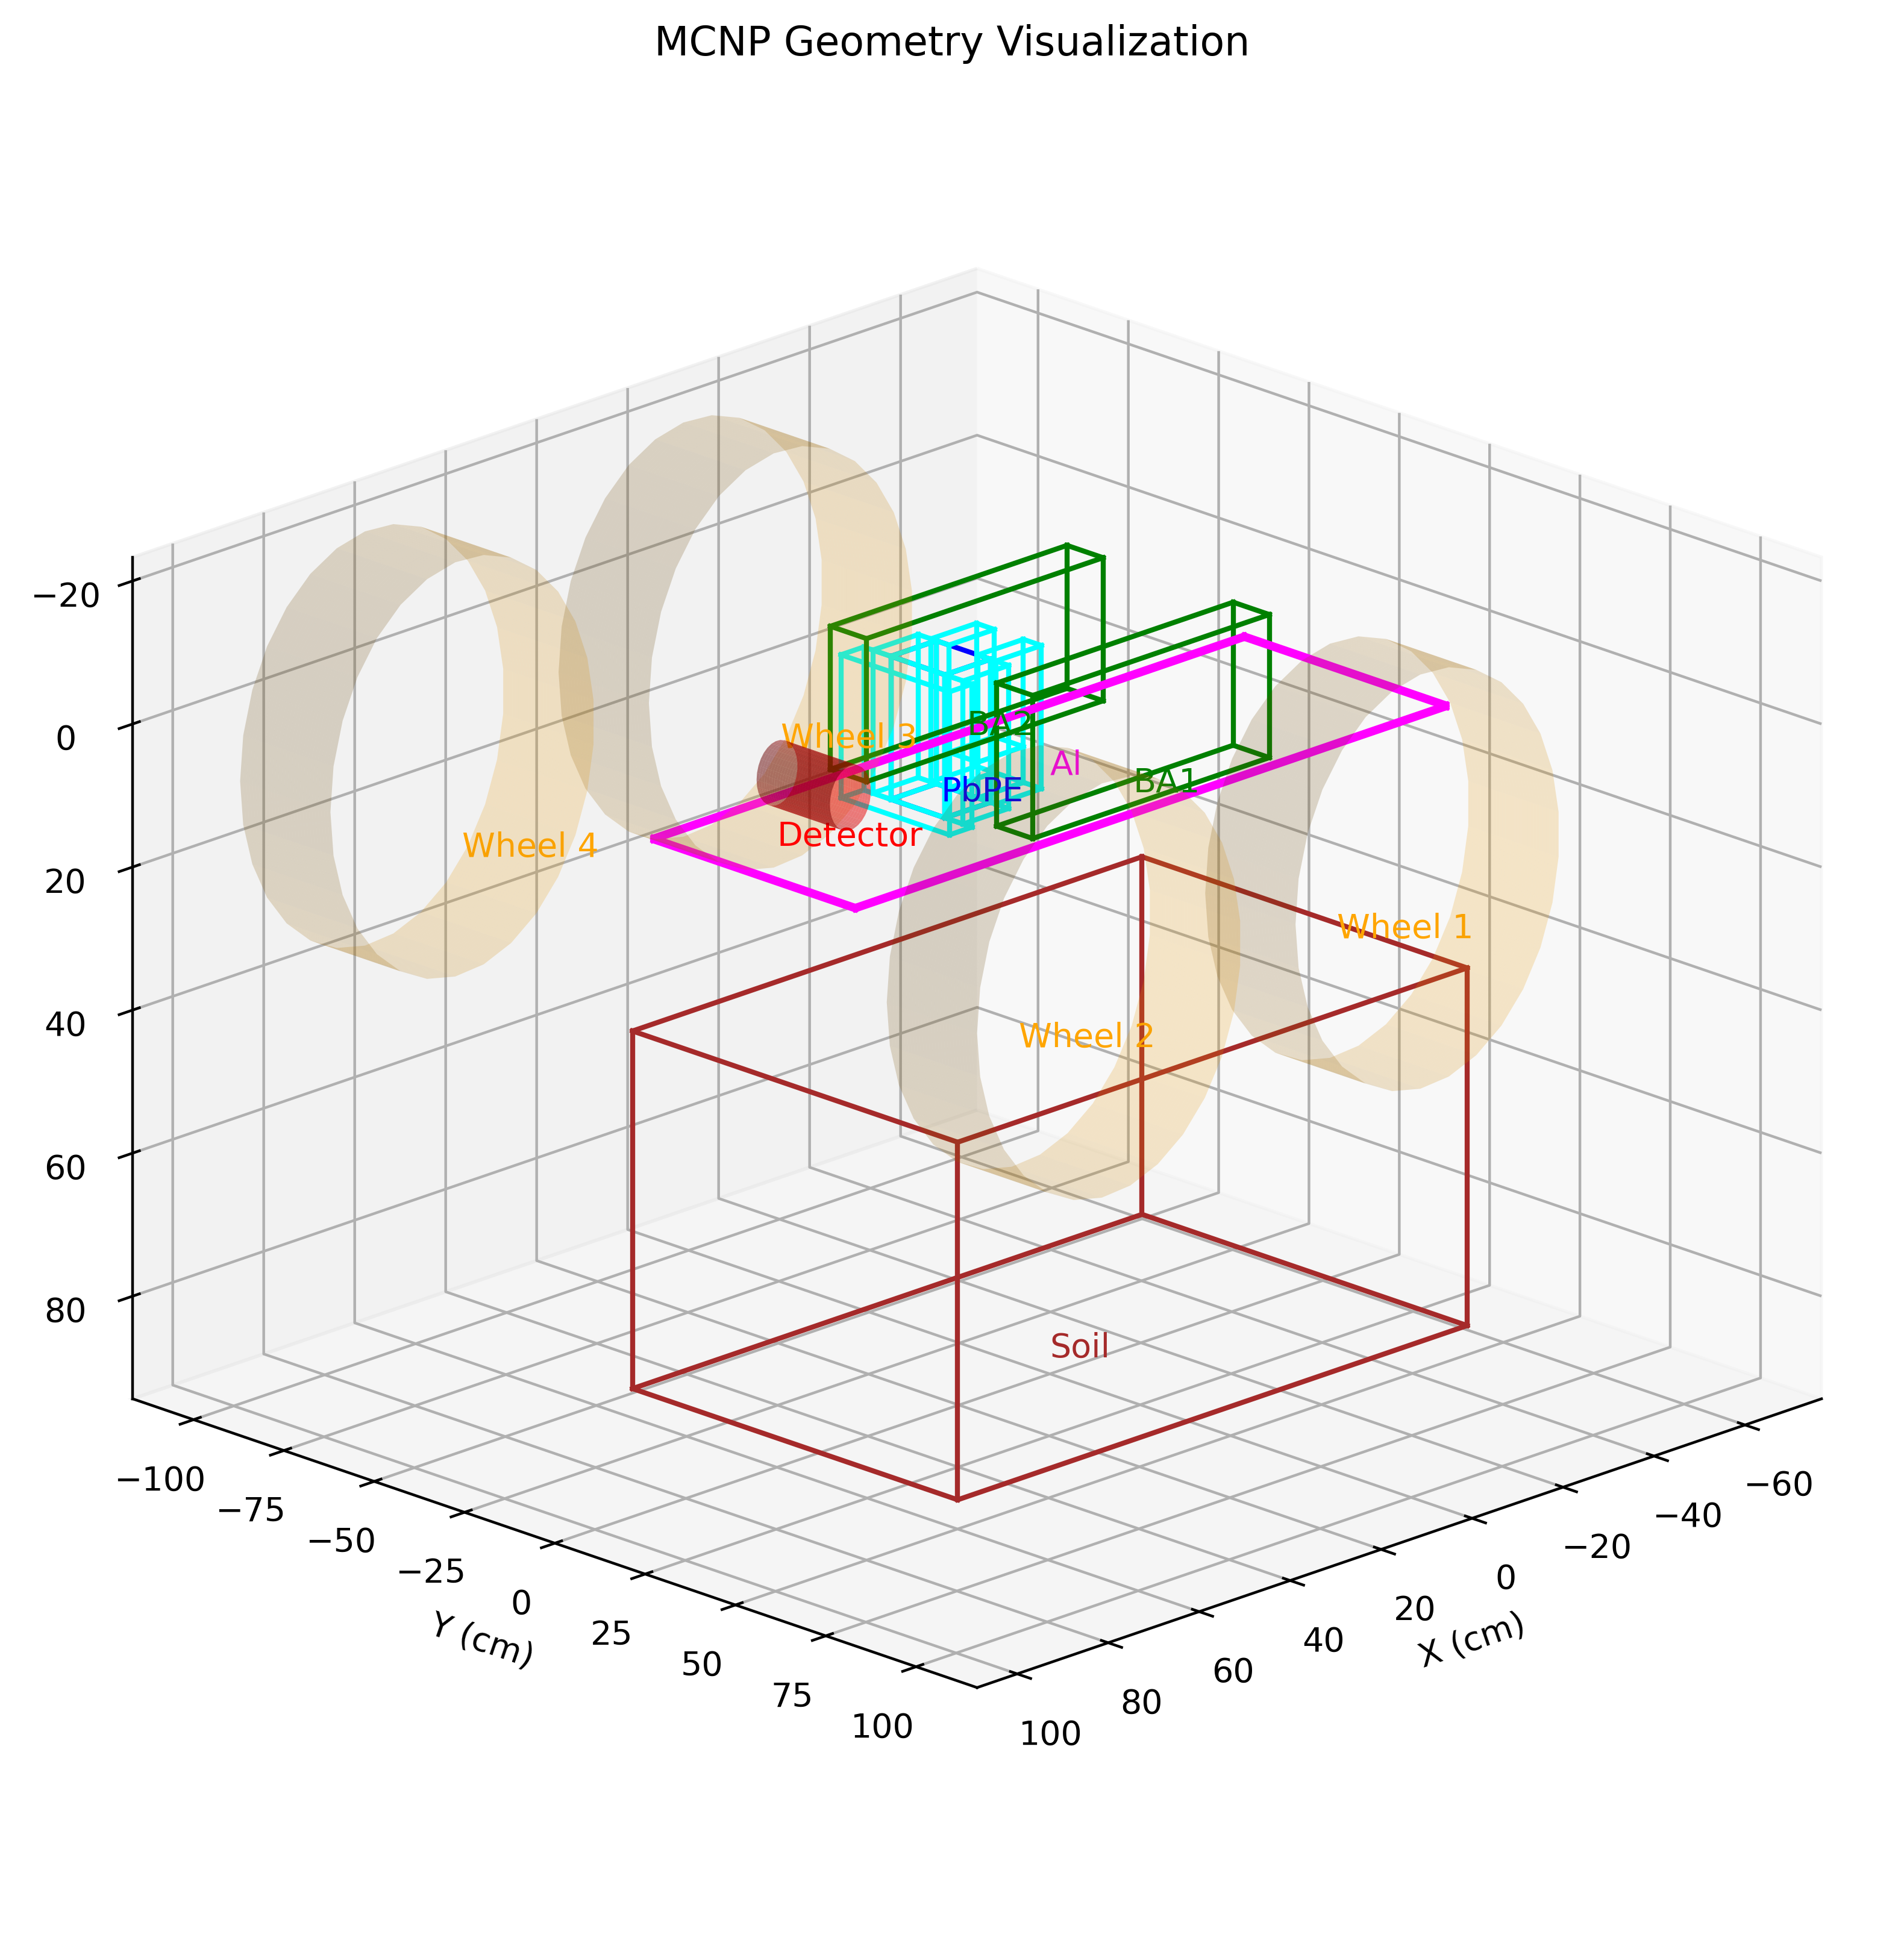

In [99]:
n = 200

fig = plt.figure(figsize=(10, 10), dpi=400)
ax = fig.add_subplot(111, projection='3d')
ax.set_proj_type('ortho')
plot_MCNP(ax)

ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Z (cm)')
ax.set_title('MCNP Geometry Visualization')
ax.view_init(elev=20, azim=45)
ax.invert_zaxis()